In [ ]:
import pandas as pd

p = pd.read_csv('patient_consolidated.csv')

In [ ]:
p.head(1)

,SR.NO,DATE,PName,Department
0,5619.0,01-01-2024,Mr VISHNU GANPATI GURAV,ORHTO


In [ ]:
p.head()

,SR.NO,DATE,PName,Department
0,5619.0,01-01-2024,Mr VISHNU GANPATI GURAV,ORHTO
1,5620.0,01-01-2024,Mrs BIRYASANI PAL,ORHTO
2,5621.0,01-01-2024,Mrs GAYATRI NETAJI GIRIBUVA,ORHTO
3,5622.0,01-01-2024,Mrs ANANDI KRUSHNATH CHAVAN,GENERAL SURGERY
4,5623.0,01-01-2024,Mr SUSHANT NIVAS KOLI,GENERAL SURGERY


In [ ]:
p.isna().sum()

,0
SR.NO,2
DATE,2
PName,2
Department,2


In [ ]:
  p.columns

Index(['SR.NO', 'DATE', 'PName', 'Department'], dtype='object')

# Predictive Analysis


In [ ]:
# Load data with DATE column in the format 'DD-MM-YYYY'
df = pd.read_csv('patient_consolidated.csv')

# Forcefully convert DATE column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')  # errors='coerce' will convert invalid parsing to NaT

# Preview the data to confirm successful loading
print(df.head())

    SR.NO       DATE                        PName       Department
0  5619.0 2024-01-01      Mr VISHNU GANPATI GURAV            ORHTO
1  5620.0 2024-01-01           Mrs BIRYASANI  PAL            ORHTO
2  5621.0 2024-01-01  Mrs GAYATRI NETAJI GIRIBUVA            ORHTO
3  5622.0 2024-01-01  Mrs ANANDI KRUSHNATH CHAVAN  GENERAL SURGERY
4  5623.0 2024-01-01        Mr SUSHANT NIVAS KOLI  GENERAL SURGERY


In [ ]:
df.shape

(6137, 4)

In [ ]:
import pandas as pd
import re

# Load data
df = pd.read_csv('patient_consolidated.csv')

# Attempt to convert DATE column to datetime format, flagging parsing errors as NaT
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# Identify rows where DATE conversion failed
invalid_dates = df[df['DATE'].isnull()]
print("Rows with invalid dates before correction:")
print(invalid_dates)

# Function to correct dates with common issues
def correct_date_format(date_str):
    # Handle common issues by attempting multiple formats
    try:
        # Attempt parsing with common formats
        return pd.to_datetime(date_str, format='%Y-%m-%d')
    except ValueError:
        pass
    try:
        return pd.to_datetime(date_str, format='%d-%m-%Y')
    except ValueError:
        pass
    try:
        # Handle swapped day/month or alternative delimiters
        date_str = re.sub(r'[^\w\s]', '-', date_str)  # Replace unusual delimiters with '-'
        return pd.to_datetime(date_str, dayfirst=True, errors='coerce')
    except ValueError:
        pass
    # Fallback to None if all attempts fail
    return None

# Apply the correction function to rows with invalid dates
df.loc[df['DATE'].isnull(), 'DATE'] = df.loc[df['DATE'].isnull(), 'DATE'].apply(correct_date_format)

# Check if there are still invalid dates
invalid_dates_after = df[df['DATE'].isnull()]
print("Rows with invalid dates after correction:")
print(invalid_dates_after)

# If there are still invalid dates after correction, investigate further or manually correct them

Rows with invalid dates before correction:
       SR.NO DATE                           PName       Department
360   5301.0  NaT         Mr ARJUN SHAMRAO AIWALE            ORHTO
361   5302.0  NaT       Miss NEHA MURLIDHAR DABDE            ORHTO
362   5303.0  NaT      Miss TEJASWINI SARDAR MORE            ORHTO
363   5304.0  NaT  Mrs SUNANDA DASHRATH SARANGALE  GENERAL SURGERY
364   5305.0  NaT             Mr SANKET BABU NAIK  GENERAL SURGERY
...      ...  ...                             ...              ...
6132     1.0  NaT    Mast ALTAMASH SALAM NAIKWADI  GENERAL SURGERY
6133     2.0  NaT        Mrs KAMAL RAJENDRA GURAV             OBGY
6134     3.0  NaT        Mr PRATIK PRALHAD JAGTAP  GENERAL SURGERY
6135     NaN  NaT                             NaN              NaN
6136     NaN  NaT                             NaN              NaN

[3723 rows x 4 columns]
Rows with invalid dates after correction:
       SR.NO DATE                           PName       Department
360   5301.0  NaT  

In [ ]:
invalid_dates.query("Department=='GENERAL MEDICINE'").shape[0]

93

In [ ]:
invalid_dates.shape[0]

3723

In [ ]:
df.shape

(6137, 4)

In [ ]:
# Extract month and year from the DATE column
df['Month'] = df['DATE'].dt.month
df['Year'] = df['DATE'].dt.year

In [ ]:
# Group by month and year to count patient visits per month
monthly_trend = df.groupby(['Year', 'Month']).size().reset_index(name='Patient_Count')

# Convert Year and Month to a single Date column for time series analysis
monthly_trend['Date'] = pd.to_datetime(monthly_trend[['Year', 'Month']].assign(Day=1))

# Set Date as the index for time series analysis
monthly_trend.set_index('Date', inplace=True)

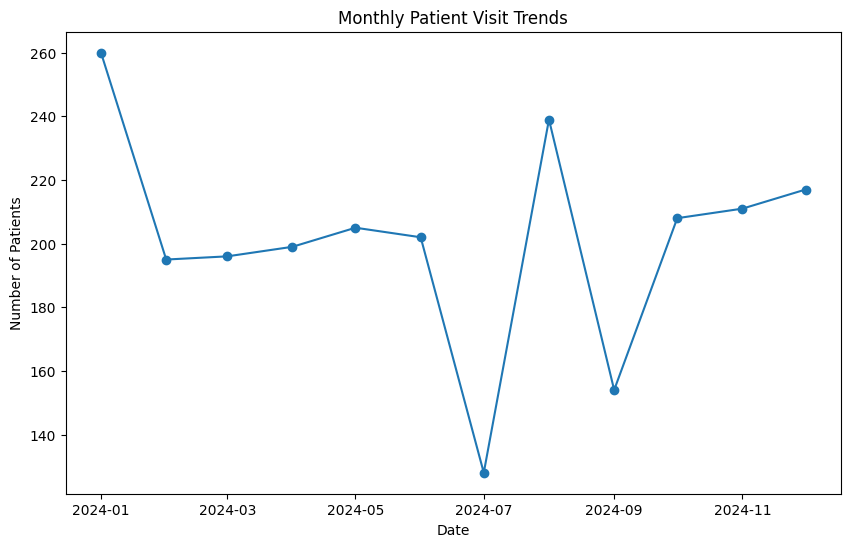

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Plot monthly patient visit trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_trend.index, monthly_trend['Patient_Count'], marker='o', linestyle='-')
plt.title('Monthly Patient Visit Trends')
plt.xlabel('Date')
plt.ylabel('Number of Patients')
plt.show()

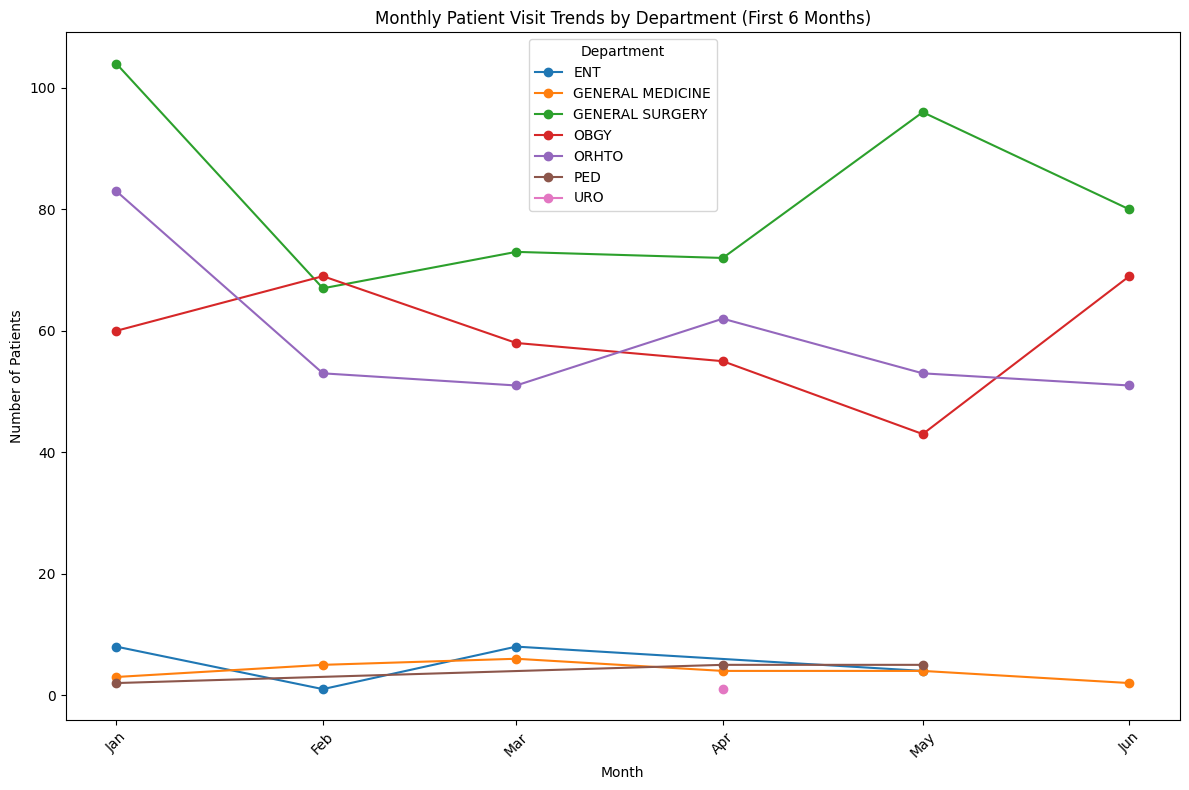

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is already loaded and processed as in the previous steps

# Group by year, month, and department to calculate patient visits per department per month
monthly_trend_department = df.groupby(['Year', 'Month', 'Department']).size().reset_index(name='Patient_Count')

# Convert Year and Month to a single Date column for time series analysis
monthly_trend_department['Date'] = pd.to_datetime(monthly_trend_department[['Year', 'Month']].assign(Day=1))

# Filter the data to include only the first 6 unique months
first_6_dates = monthly_trend_department['Date'].unique()[:6]
monthly_trend_first_6 = monthly_trend_department[monthly_trend_department['Date'].isin(first_6_dates)]

# Plot monthly patient visit trends for each department for the first 6 months
plt.figure(figsize=(12, 8))
for department in monthly_trend_first_6['Department'].unique():
    department_data = monthly_trend_first_6[monthly_trend_first_6['Department'] == department]
    plt.plot(department_data['Date'], department_data['Patient_Count'], marker='o', linestyle='-', label=department)

# Format the x-axis to show only month names for the first 6 unique dates
month_names = pd.to_datetime(first_6_dates).strftime('%b')  # 'Jan', 'Feb', etc.
plt.gca().set_xticks(first_6_dates)  # Set ticks to the first 6 unique dates
plt.gca().set_xticklabels(month_names, rotation=45)  # Set labels to month names and rotate for readability

plt.title('Monthly Patient Visit Trends by Department (First 6 Months)')
plt.xlabel('Month')
plt.ylabel('Number of Patients')
plt.legend(title="Department")
plt.tight_layout()
plt.show()

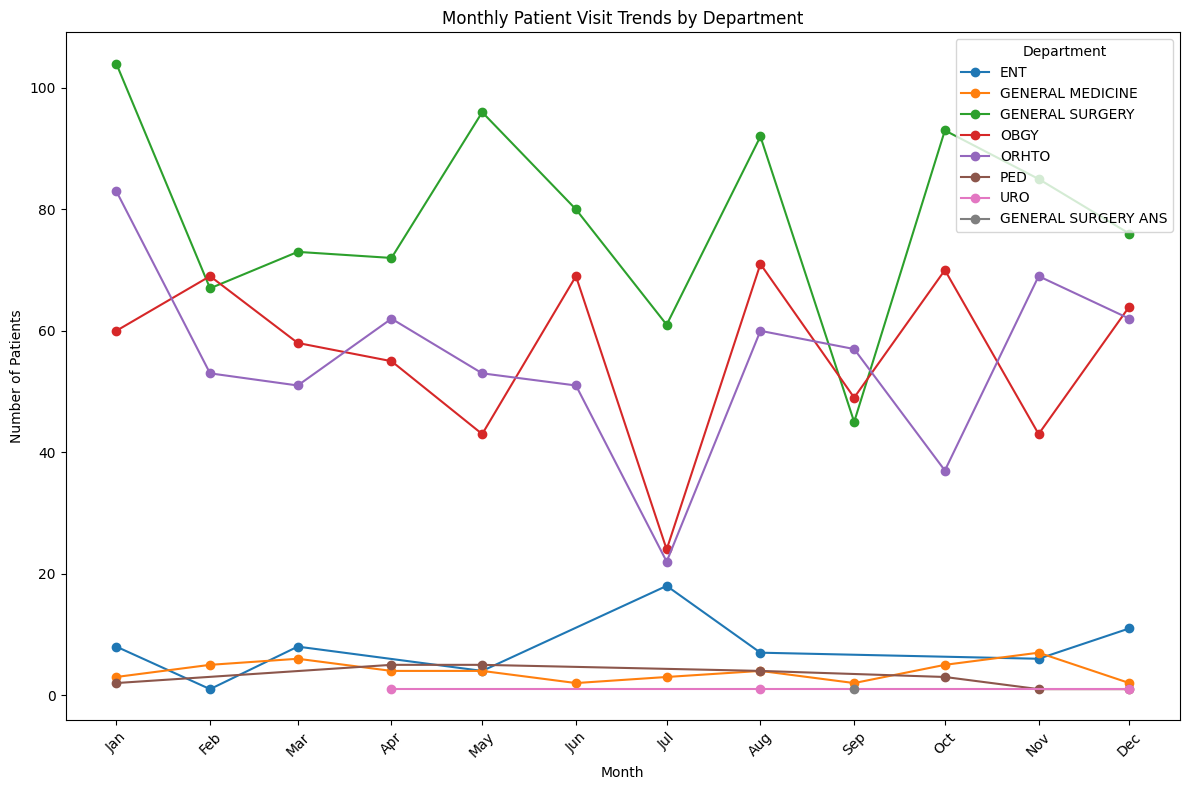

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is already loaded and processed as in the previous steps

# Group by year, month, and department to calculate patient visits per department per month
monthly_trend_department = df.groupby(['Year', 'Month', 'Department']).size().reset_index(name='Patient_Count')

# Convert Year and Month to a single Date column for time series analysis
monthly_trend_department['Date'] = pd.to_datetime(monthly_trend_department[['Year', 'Month']].assign(Day=1))

# Plot monthly patient visit trends for each department
plt.figure(figsize=(12, 8))
for department in monthly_trend_department['Department'].unique():
    department_data = monthly_trend_department[monthly_trend_department['Department'] == department]
    plt.plot(department_data['Date'], department_data['Patient_Count'], marker='o', linestyle='-', label=department)

# Format the x-axis to show only month names
month_names = monthly_trend_department['Date'].dt.strftime('%b')  # 'Jan', 'Feb', etc.
plt.gca().set_xticks(monthly_trend_department['Date'].unique())  # Set ticks to unique dates
plt.gca().set_xticklabels(month_names.unique(), rotation=45)  # Set labels to month names and rotate for readability

plt.title('Monthly Patient Visit Trends by Department')
plt.xlabel('Month')
plt.ylabel('Number of Patients')
plt.legend(title="Department")
plt.tight_layout()
plt.show()

In [ ]:
p = p.dropna()
p.isna().sum()

,0
SR.NO,0
DATE,0
PName,0
Department,0


# Predictive Analysis for Patient and seasonal inflow and outflow

       SR.NO DATE                           PName       Department
360   5301.0  NaT         Mr ARJUN SHAMRAO AIWALE            ORHTO
361   5302.0  NaT       Miss NEHA MURLIDHAR DABDE            ORHTO
362   5303.0  NaT      Miss TEJASWINI SARDAR MORE            ORHTO
363   5304.0  NaT  Mrs SUNANDA DASHRATH SARANGALE  GENERAL SURGERY
364   5305.0  NaT             Mr SANKET BABU NAIK  GENERAL SURGERY
...      ...  ...                             ...              ...
6132     1.0  NaT    Mast ALTAMASH SALAM NAIKWADI  GENERAL SURGERY
6133     2.0  NaT        Mrs KAMAL RAJENDRA GURAV             OBGY
6134     3.0  NaT        Mr PRATIK PRALHAD JAGTAP  GENERAL SURGERY
6135     NaN  NaT                             NaN              NaN
6136     NaN  NaT                             NaN              NaN

[3723 rows x 4 columns]
Department: ENT - RMSE: 2.915481410516977


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

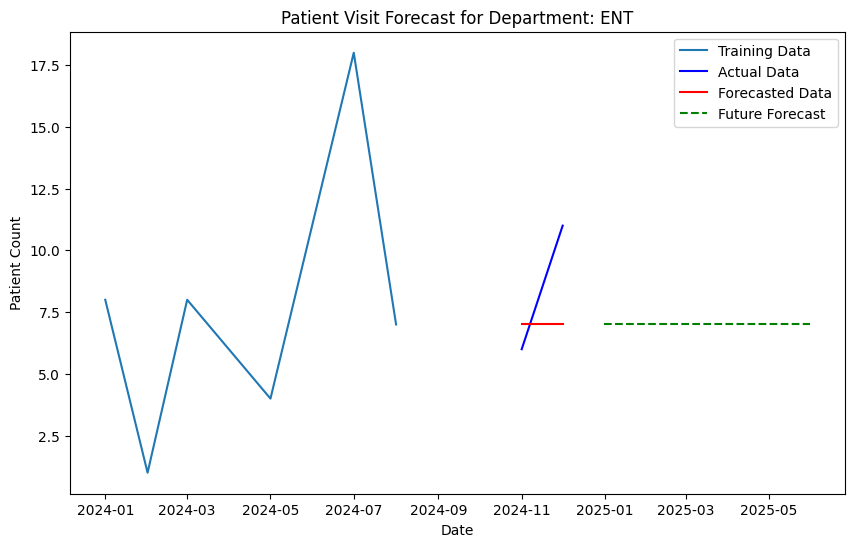

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-70-cbdb453f363a>:66: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(test.index[-1], periods=6, freq='M'), future_forecast, label='Future Forecast', color='green', linestyle='--')


Department: GENERAL MEDICINE - RMSE: 2.6336752683171456


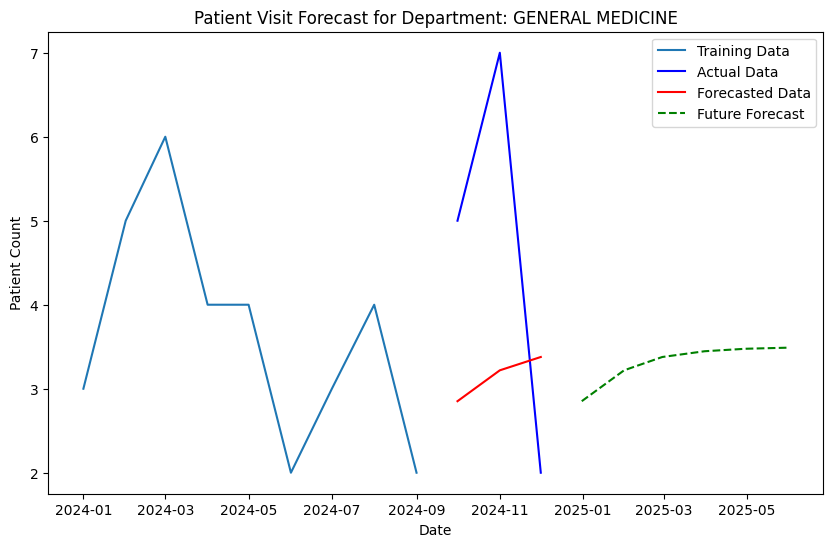

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-70-cbdb453f363a>:66: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(test.index[-1], periods=6, freq='M'), future_forecast, label='Future Forecast', color='green', linestyle='--')


Department: GENERAL SURGERY - RMSE: 13.56820309854857


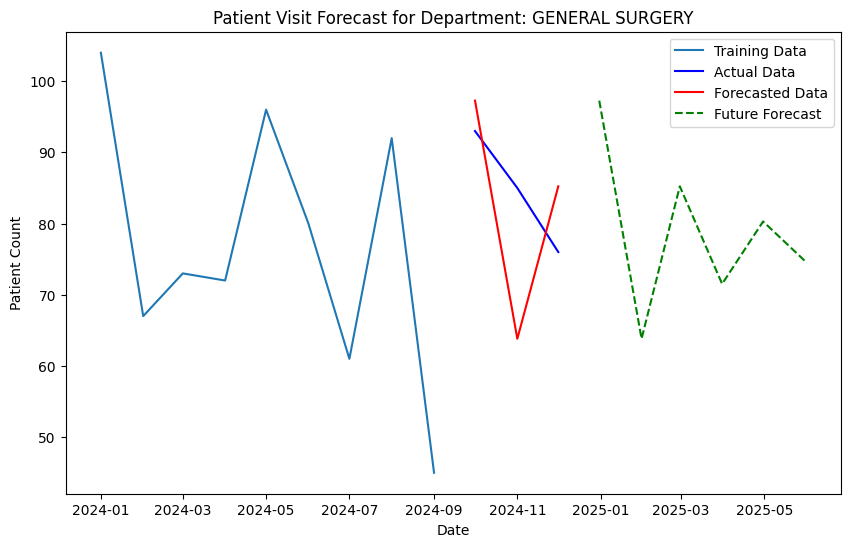

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-70-cbdb453f363a>:66: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(test.index[-1], periods=6, freq='M'), future_forecast, label='Future Forecast', color='green', linestyle='--')


Department: OBGY - RMSE: 9.92486712199326


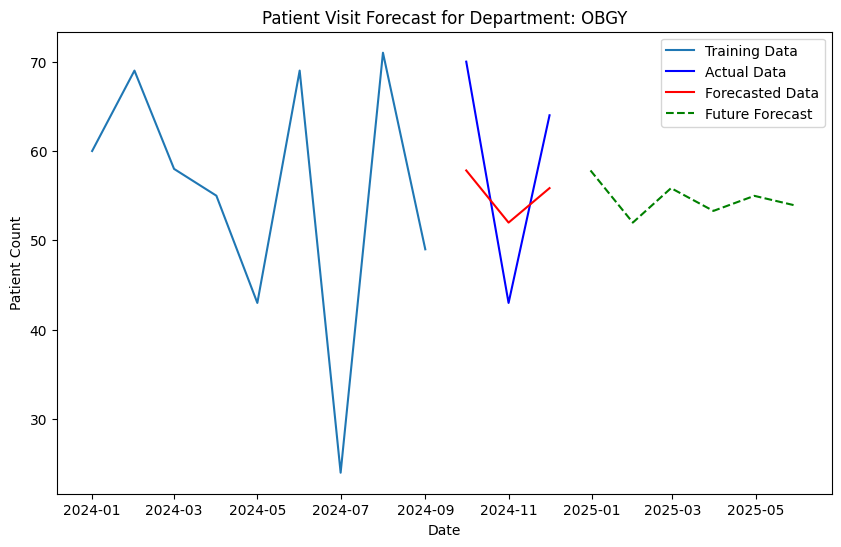

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Department: ORHTO - RMSE: 14.220990674628974


<ipython-input-70-cbdb453f363a>:66: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(test.index[-1], periods=6, freq='M'), future_forecast, label='Future Forecast', color='green', linestyle='--')


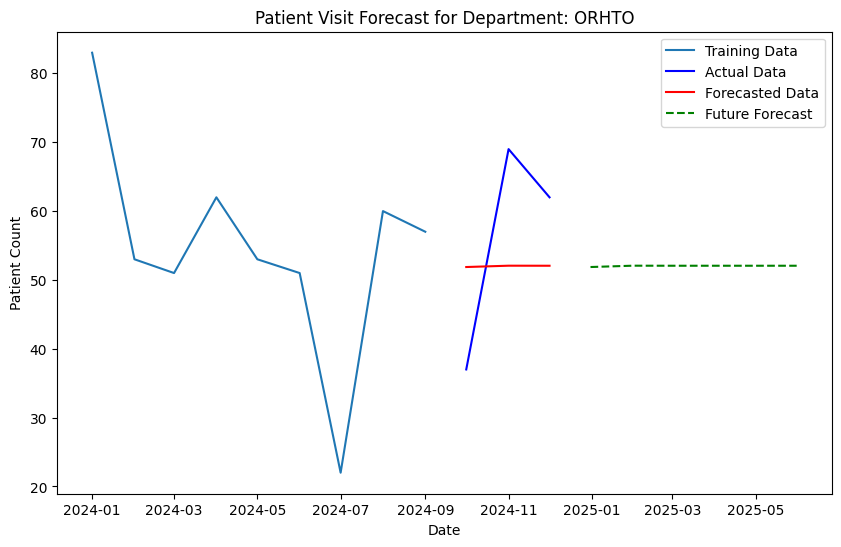

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

Department: PED - RMSE: 1.4201522289554043


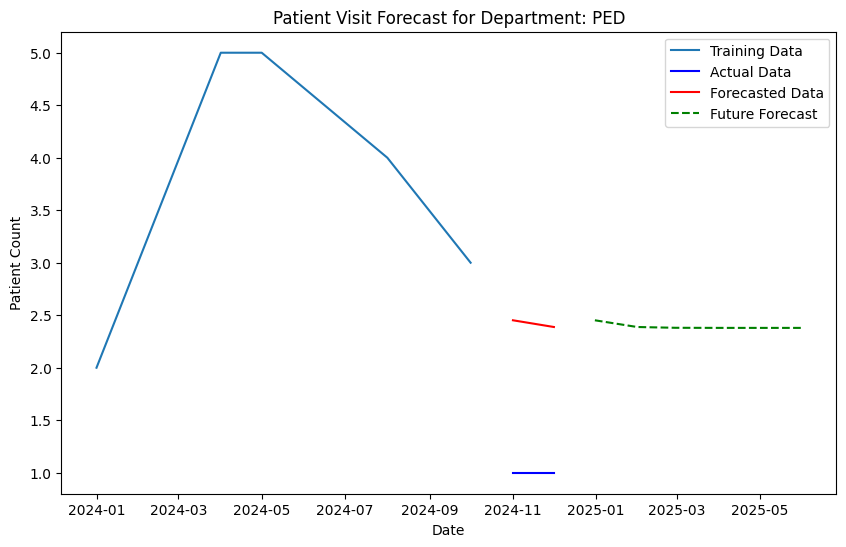

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Load data
df = pd.read_csv('patient_consolidated.csv')

# Forcefully convert DATE column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')  # errors='coerce' converts parsing errors to NaT

# Check for any rows where DATE conversion failed and print those rows
if df['DATE'].isnull().any():
    print("Warning: Some dates could not be parsed. Here are the problematic rows:")
    print(df[df['DATE'].isnull()])

    # Drop rows with invalid dates after printing
    df = df.dropna(subset=['DATE'])

# Extract month and year from the DATE column
df['Month'] = df['DATE'].dt.month
df['Year'] = df['DATE'].dt.year

# Group by year, month, and department to calculate patient visits per department per month
monthly_trend_department = df.groupby(['Year', 'Month', 'Department']).size().reset_index(name='Patient_Count')

# Convert Year and Month to a single Date column for time series analysis
monthly_trend_department['Date'] = pd.to_datetime(monthly_trend_department[['Year', 'Month']].assign(Day=1))

# Dictionary to store forecast results
forecast_results = {}

# Forecasting for each department
for department in monthly_trend_department['Department'].unique():
    # Filter data for the current department
    department_data = monthly_trend_department[monthly_trend_department['Department'] == department]
    department_data.set_index('Date', inplace=True)
    department_data = department_data['Patient_Count']  # Only keep the Patient_Count series

    # Train-test split (80% for training, 20% for testing)
    train_size = int(len(department_data) * 0.8)
    train, test = department_data[:train_size], department_data[train_size:]

    # Fit the ARIMA model on the training data
    model = ARIMA(train, order=(1, 1, 1))  # Adjust (p, d, q) based on ACF/PACF plots if necessary
    model_fit = model.fit()

    # Forecast for the test period
    forecast = model_fit.forecast(steps=len(test))

    # Calculate and print model performance
    mse = mean_squared_error(test, forecast)
    rmse = np.sqrt(mse)
    print(f'Department: {department} - RMSE: {rmse}')

    # Forecast for future months (e.g., next 6 months)
    future_forecast = model_fit.forecast(steps=6)
    forecast_results[department] = future_forecast

    # Plot actual, test, and forecasted values
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train, label='Training Data')
    plt.plot(test.index, test, label='Actual Data', color='blue')
    plt.plot(test.index, forecast, label='Forecasted Data', color='red')
    plt.plot(pd.date_range(test.index[-1], periods=6, freq='M'), future_forecast, label='Future Forecast', color='green', linestyle='--')
    plt.title(f'Patient Visit Forecast for Department: {department}')
    plt.xlabel('Date')
    plt.ylabel('Patient Count')
    plt.legend()
    plt.show()

# Print future forecast results
print("\nForecast for next 6 months by Department:")
for dept, forecast in forecast_results.items():
    print(f"\n{dept} Department Forecast:")
    print(forecast)

Using Seasonal ARIMA

In [ ]:
!pip install prophet

Depts over 400

In [ ]:
# Group by year, month, and department to get patient visits per department per month
monthly_trend_department = df.groupby(['Year', 'Month', 'Department']).size().reset_index(name='Patient_Count')

# Check if any department exceeds 400 patients per month
departments_over_400 = monthly_trend_department[monthly_trend_department['Patient_Count'] > 400]

# Display results
print("Departments with monthly patient counts exceeding 400:")
print(departments_over_400)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load data
df = pd.read_csv('patient_consolidated.csv')
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df = df.dropna(subset=['DATE'])
df['Month'] = df['DATE'].dt.month
df['Year'] = df['DATE'].dt.year

# Group by year, month, and department to calculate patient visits per department per month
monthly_trend_department = df.groupby(['Year', 'Month', 'Department']).size().reset_index(name='Patient_Count')
monthly_trend_department['Date'] = pd.to_datetime(monthly_trend_department[['Year', 'Month']].assign(Day=1))

# Dictionary to store ensemble forecast results
forecast_results = {}

for department in monthly_trend_department['Department'].unique():
    department_data = monthly_trend_department[monthly_trend_department['Department'] == department]
    department_data = department_data.set_index('Date')['Patient_Count']

    # Train-test split
    train_size = int(len(department_data) * 0.8)
    train, test = department_data[:train_size], department_data[train_size:]

    # SARIMA Model
    sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False)
    sarima_model_fit = sarima_model.fit(disp=False)
    sarima_forecast = sarima_model_fit.get_forecast(steps=12).predicted_mean.clip(lower=200, upper=500)  # Set bounds

    # Prophet Model
    prophet_data = train.reset_index().rename(columns={'Date': 'ds', 'Patient_Count': 'y'})
    prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=False)
    prophet_model.fit(prophet_data)
    future = prophet_model.make_future_dataframe(periods=12, freq='M')
    prophet_forecast = prophet_model.predict(future).set_index('ds')['yhat'].clip(lower=200, upper=500)

    # Ensemble Forecast
    ensemble_forecast = (sarima_forecast + prophet_forecast[-12:]) / 2  # Average of SARIMA and Prophet

    # Plot the ensemble forecast
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train, label='Training Data')
    plt.plot(test.index, test, label='Actual Data', color='blue')
    plt.plot(ensemble_forecast.index, ensemble_forecast, label='Ensemble Forecast', color='red')
    plt.ylim(0, 500)  # Cap the y-axis at 500
    plt.title(f'Patient Visit Forecast for Department: {department}')
    plt.xlabel('Month')
    plt.ylabel('Patient Count')
    plt.legend()
    plt.show()

    # Store forecasted values for each department
    forecast_results[department] = ensemble_forecast

print("\nEnsemble Forecast for next 12 months by Department:")
for dept, forecast in forecast_results.items():
    print(f"\n{dept} Department Forecast:")
    print(forecast)

# Date Time second attempt


# Auto Inventory Code

In [ ]:
import pandas as pd

# Sample function to adjust inventory levels based on patient visits for departments
# Assumes the patient data has columns 'DATE', 'PName', and 'Department'

def adjust_inventory(patient_data, medicine_data, stock_threshold=10):
    recommendations = []

    # Preprocessing patient data
    patient_data['DATE'] = pd.to_datetime(patient_data['DATE'])  # Ensuring DATE is datetime type
    patient_data['Month'] = patient_data['DATE'].dt.month_name()  # Extract month for analysis

    # Calculate monthly patient counts per department
    monthly_visits = patient_data.groupby(['Department', 'Month']).size().reset_index(name='Patient_Count')

    # Loop through each department in patient data
    for department in monthly_visits['Department'].unique():
        # Get monthly patient counts for the current department
        dept_patient_counts = monthly_visits[monthly_visits['Department'] == department]
        # Filter medicines used by the department (based on Category Name)
        dept_medicines = medicine_data[medicine_data['Category Name'] == department]

        # Calculate average monthly patient count for demand estimation
        avg_patient_count = dept_patient_counts['Patient_Count'].mean()

        # Loop through medicines and make stock adjustment recommendations
        for _, row in dept_medicines.iterrows():
            active_stock = row['Active Stock']
            medicine_name = row['Medicine Name']
            category = row['Category Name']

            # Adjust stock based on threshold or predicted demand
            if active_stock < stock_threshold:
                recommendation = (f"Recommendation: Increase stock of '{medicine_name}' in '{category}'. "
                                  f"Current active stock is {active_stock}, below the threshold of {stock_threshold}.")
                recommendations.append(recommendation)
            elif avg_patient_count > active_stock:
                recommendation = (f"Recommendation: Consider increasing '{medicine_name}' in '{category}' to meet demand. "
                                  f"Avg monthly patients: {avg_patient_count}, but active stock is {active_stock}.")
                recommendations.append(recommendation)
            else:
                recommendation = (f"Stock for '{medicine_name}' in '{category}' is adequate.")
                recommendations.append(recommendation)

    return recommendations

# Assuming `patient_data.csv` is the input file with columns ['DATE', 'PName', 'Department'] and `medicine_data` as previously defined
def main():
    # Load patient data
    patient_data = pd.read_csv('/content/patient_consolidated.csv')  # Replace 'patient_data.csv' with the actual file path

    # Sample medicine data as provided
    medicine_data = pd.DataFrame({
        'Medicine Name': ['TYNOR THUMB SPICA', '2 WAY FOLEYS BALLON CATHETER FG-16', 'A TO Z NS NEW STRIP OF 15 TABLETS',
                          'A TO Z NS STRAWBERRY FLAVOUR BOTTLE OF 15ML DROPS', 'AAPSON C FIT HINGED KNEE SUPPORT M'],
        'Category Name': ['GENERAL SURGERY', 'GENERAL MEDICINE', 'GENERAL MEDICINE', 'PED', 'ORTHO'],
        'Item Type': ['SPINLT', 'PACKET', 'PACKET', 'PACKET', 'BOX'],
        'Opening Stock': [0, 4, 1, 80, 0],
        'Purchase Qty': [4, 5, 0, 905, 23],
        'Closing Quantity': [2, 4, 0, 70, 5],
        'Active Stock': [2, 5, 1, 915, 18]
    })

    # Generate inventory adjustment recommendations
    recommendations = adjust_inventory(patient_data, medicine_data)

    # Print recommendations
    for rec in recommendations:
        print(rec)

# Run the example function
# Uncomment the next line to run the function in your environment where 'patient_data.csv' exists
main()

ValueError: time data "13-01-2024" doesn't match format "%m-%d-%Y", at position 12. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# General Medicine, General Surgery, and Ortho departments data for expiry and patient visits
expiry_data = {
    'Expiry': pd.to_datetime(['2024-02-01', '2024-03-01', '2024-04-01', '2024-06-01', '2024-08-01', '2024-10-01']),
    'Count': [20, 15, 18, 17, 20, 10],
    'Department': ['General Medicine', 'General Medicine', 'General Surgery', 'General Surgery', 'Ortho', 'Ortho']
}

visit_data = {
    'Month': pd.date_range(start="2024-01-01", end="2024-12-01", freq='M'),
    'General Medicine': [40, 45, 42, 47, 55, 50, 52, 60, 58, 54, 56, 53],
    'General Surgery': [85, 90, 88, 95, 93, 89, 92, 97, 95, 91, 94, 90],
    'Ortho': [10, 12, 14, 15, 16, 15, 17, 18, 17, 16, 15, 14]
}

# Creating DataFrames for expiry and visits
expiry_df = pd.DataFrame(expiry_data)
visit_df = pd.DataFrame(visit_data)

# Plotting the combined graph for General Medicine, General Surgery, and Ortho
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot patient visits data for each department on the primary y-axis
for department in ['General Medicine', 'General Surgery', 'Ortho']:
    ax1.plot(visit_df['Month'], visit_df[department], marker='o', label=f'{department} Patient Visits')

# Set up the primary y-axis for patient visit counts
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Patients')
ax1.set_title('Combined Patient Visits and Expiring Stock Trends')
ax1.legend(loc='upper left')
ax1.grid(False)

# Create a secondary y-axis to plot expiry data for each department
ax2 = ax1.twinx()
for dept, dept_expiry_df in expiry_df.groupby('Department'):
    if dept in ['General Medicine', 'General Surgery', 'Ortho']:
        ax2.plot(dept_expiry_df['Expiry'], dept_expiry_df['Count'], linestyle='--', marker='x', label=f'{dept} Expiring Stock')

# Set up the secondary y-axis for expiring stock counts
ax2.set_ylabel('Expiring Stock Count')
ax2.legend(loc='upper right')

# Final formatting and display
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-1-41707e5968c2>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Month': pd.date_range(start="2024-01-01", end="2024-12-01", freq='M'),


ValueError: All arrays must be of the same length

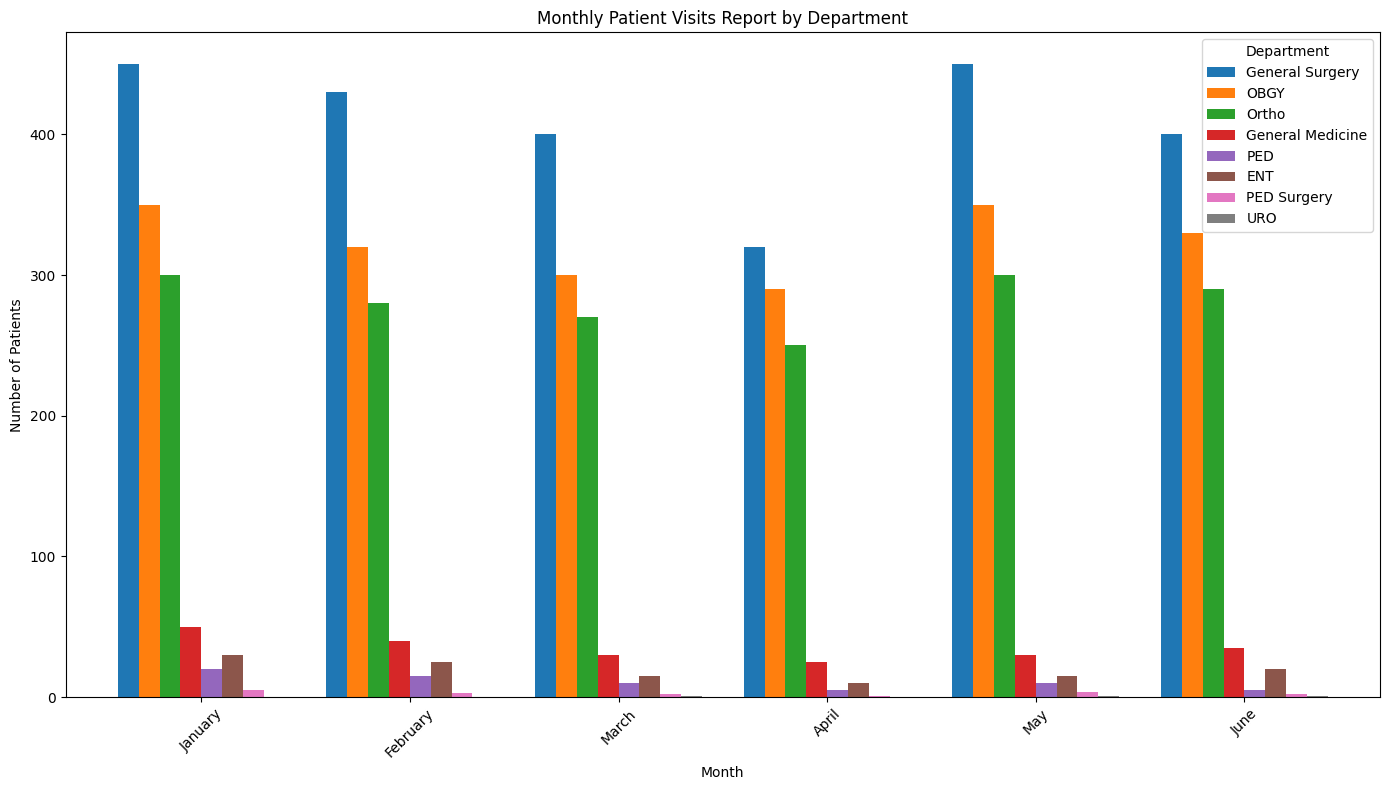

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from predictive analysis
data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June'],
    'General Surgery': [450, 430, 400, 320, 450, 400],
    'OBGY': [350, 320, 300, 290, 350, 330],
    'Ortho': [300, 280, 270, 250, 300, 290],
    'General Medicine': [50, 40, 30, 25, 30, 35],
    'PED': [20, 15, 10, 5, 10, 5],
    'ENT': [30, 25, 15, 10, 15, 20],
    'PED Surgery': [5, 3, 2, 1, 4, 2],
    'URO': [0, 0, 1, 0, 1, 1]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set month as index for better visualization
df.set_index('Month', inplace=True)

# Plotting
ax = df.plot(kind='bar', figsize=(14, 8), width=0.8)

# Add titles and labels
plt.title("Monthly Patient Visits Report by Department")
plt.xlabel("Month")
plt.ylabel("Number of Patients")
plt.legend(title="Department")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()